In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

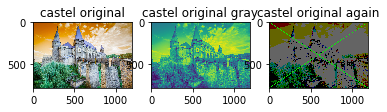

In [30]:
cattle=cv2.imread('castle.jpg')
fig=plt.figure()
ax=fig.add_subplot(1,3,1)
ax.set_title("castel original")
plt.imshow(cattle)
ax=fig.add_subplot(1,3,2)
ax.set_title("castel original gray")
plt.imshow(cv2.cvtColor(cattle,cv2.COLOR_RGB2GRAY))
ax=fig.add_subplot(1,3,3)
ax.set_title("castel original again")
ret,thres=cv2.threshold(cattle,100,100,0)
cv2.line(thres,(0,0),(thres.shape[1],thres.shape[0]),(0,255,0),4)
cv2.line(thres,(thres.shape[1],0),(0,thres.shape[0]),(0,255,0),4)
plt.imshow(thres)

True

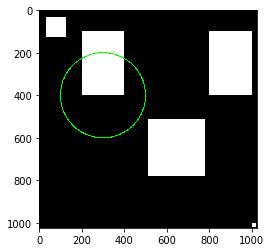

In [3]:
black=np.zeros((1024,1024,3),np.uint8)
cv2.rectangle(black,(32,32),(128,128),(255,255,255),-1)
cv2.rectangle(black,(512,512),(780,780),(255,255,255),-1)
cv2.rectangle(black,(1000,1000),(1020,1020),(255,255,255),-1)
cv2.rectangle(black,(200,100),(400,400),(255,255,255),-1)
cv2.rectangle(black,(800,100),(1000,400),(255,255,255),-1)
cv2.circle(black,(300,400),200,(0,255,0),4)
plt.imshow(black)
cv2.imwrite('white_rect.jpg',black)

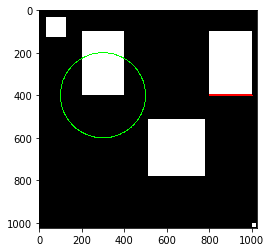

In [4]:
gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)
can=cv2.Canny(gray,30,200)
lines=cv2.HoughLinesP(can,1,np.pi/180,100,60,10)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(black,(x1,y1),(x2,y2),(255,0,0),8)
plt.imshow(black)

In [1]:
gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)
can=cv2.Canny(gray,30,200)
con_img,contours,hierarchy=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(black,contours,-1,(0,255,0),5)
plt.imshow(black)

NameError: name 'cv2' is not defined

In [4]:
# contour yourself in video camera
'''import cv2
import matplotlib.pyplot as plt
def sketch(black):
    gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)
    can=cv2.Canny(gray,30,200)
    con_img,contours,hierarchy=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(black,contours,-1,(0,0,255),1)
    return black
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    cv2.imshow("skecth",sketch(frame))
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()
'''


'import cv2\nimport matplotlib.pyplot as plt\ndef sketch(black):\n    gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)\n    can=cv2.Canny(gray,30,200)\n    con_img,contours,hierarchy=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)\n    cv2.drawContours(black,contours,-1,(0,0,255),1)\n    return black\ncap=cv2.VideoCapture(0)\nwhile True:\n    ret,frame=cap.read()\n    cv2.imshow("skecth",sketch(frame))\n    if cv2.waitKey(1)==13:\n        break\ncap.release()\ncv2.destroyAllWindows()\n'

In [5]:
print(cv2.contourArea(contours[2]))
rev_sorted_count=sorted(contours,key=cv2.contourArea,reverse=True)
print(cv2.contourArea(rev_sorted_count[0]))

60498.0
72358.0


In [6]:
cv2.moments(contours[0])

{'m00': 438.0,
 'm01': 442180.6666666666,
 'm02': 446417146.0,
 'm03': 450710274190.4,
 'm10': 442180.6666666666,
 'm11': 446401146.6666666,
 'm12': 450677971523.4667,
 'm20': 446417146.0,
 'm21': 450677971523.4667,
 'm30': 450710274190.4,
 'mu02': 15908.61694586277,
 'mu03': -228.3314208984375,
 'mu11': -90.71638751029968,
 'mu12': 1195.509549871087,
 'mu20': 15908.61694586277,
 'mu21': 1195.509549871087,
 'mu30': -228.3314208984375,
 'nu02': 0.0829247562908549,
 'nu03': -5.686963004116457e-05,
 'nu11': -0.00047286538807729024,
 'nu12': 0.00029776097194301283,
 'nu20': 0.0829247562908549,
 'nu21': 0.00029776097194301283,
 'nu30': -5.686963004116457e-05}

In [7]:
def center_of_contour(x_c):
    M=cv2.moments(x_c)
    return (int(M['m10']/M['m00']),int(M['m01']/M['m00']))
def x_cord_contour(x_c):
    if cv2.contourArea(x_c) >9:
        return center_of_contour(x_c)[0]

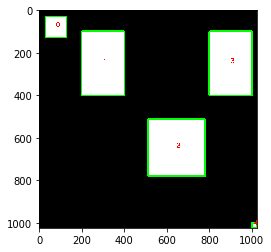

In [8]:
sorted_x_contour=sorted(contours,key=x_cord_contour)
for (i,j) in enumerate(sorted_x_contour):
    cv2.putText(black,str(i),center_of_contour(j),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
plt.imshow(black)

In [31]:
## testing enumerate function
import random
li=list()
for i in range(10):
    li.append(random.randint(20,50))
for (j,k) in enumerate(li):
    print(str(j)+" "+str(k))

0 34
1 36
2 25
3 50
4 41
5 24
6 34
7 22
8 47
9 25


6562

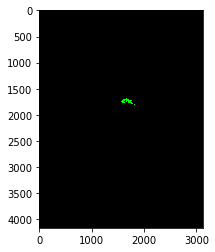

In [32]:
book=cv2.imread('book_2.jpg')
kernel_shape=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened=cv2.filter2D(book,-1,kernel_shape)
bl=cv2.blur(sharpened,(3,3))
gray=cv2.cvtColor(bl,cv2.COLOR_RGB2GRAY)
can=cv2.Canny(gray,50,200)
black_image=np.zeros((book.shape[0],book.shape[1],3),np.uint8)
book_img_contour,contour_book,hierarchy_book=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
sorted_cont=sorted(contour_book,key=cv2.contourArea,reverse=True)
cv2.drawContours(black_image,sorted_cont[0],-1,(0,255,0),5)
plt.imshow(black_image)
len(contour_book)

793

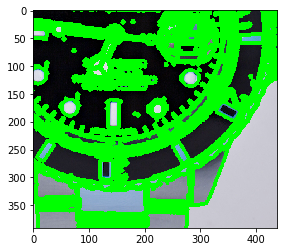

In [33]:
book=cv2.imread('watch.jpg')
kernel_shape=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened=cv2.filter2D(book,-1,kernel_shape)
bl=cv2.blur(sharpened,(3,3))
gray=cv2.cvtColor(bl,cv2.COLOR_RGB2GRAY)
can=cv2.Canny(gray,50,200)
#black_image=np.zeros((book.shape[0],book.shape[1],3),np.uint8)
book_img_contour,contour_book,hierarchy_book=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for (i,c) in enumerate(contour_book):
    #accuracy=0.08*cv2.arcLength(c,True)
    #approx=cv2.approxPolyDP(c,accuracy,True)
    hull=cv2.convexHull(c)
    #cv2.drawContours(book,[hull],0,(0,255,0),5)
cv2.drawContours(book,contour_book,-1,(0,255,0),5)
#print(hull)
sorted_cont=sorted(contour_book,key=cv2.contourArea,reverse=True)
(x,y,w,h)=cv2.boundingRect(sorted_cont[0])
plt.imshow(book[x:x+w,y:y+h])
len(contour_book)

True

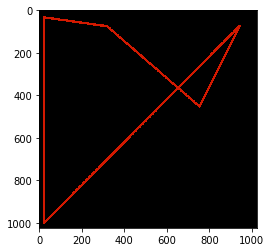

In [34]:
black_shape=np.zeros((1024,1024,3),np.uint8)
pts=np.array([[23,34],[320,76],[754,453],[942,74],[23,1000]],np.int32)
pts=pts.reshape((-1,1,2))
cv2.polylines(black_shape,[pts],True,(210,25,0),10)  
plt.imshow(black_shape)
#cv2.imwrite("red_line.jpg")
cv2.imwrite('red_line.jpg',black_shape)

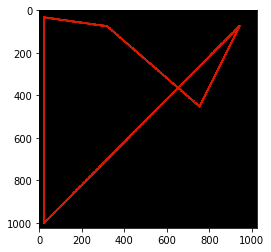

In [35]:
#approximating contours
black_shape=cv2.imread('red_line.jpg')
#plt.imshow(black_shape)
kernel_shape=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened=cv2.filter2D(black_shape,-1,kernel_shape)
bl=cv2.blur(sharpened,(3,3))
gray=cv2.cvtColor(bl,cv2.COLOR_RGB2GRAY)
can=cv2.Canny(gray,50,200)
image,contours_red_line,hierar=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(black_shape,contours_red_line,-1,(0,255,0),5)
plt.imshow(black_shape)
#for c in contours_red_line

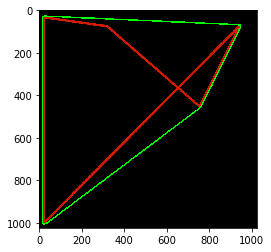

In [36]:
for c in contours_red_line:
    #accuracy=0.08*cv2.arcLength(c,True)
    #approx=cv2.approxPolyDP(c,accuracy,True)
    hull=cv2.convexHull(c)
    cv2.drawContours(black_shape,[hull],0,(0,255,0),5)
plt.imshow(black_shape)

1
match found 0.021655705792809954


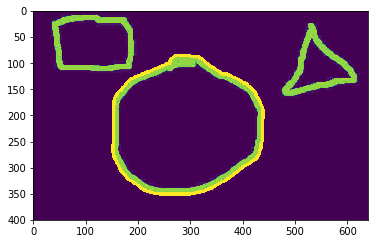

In [37]:
dist_img=cv2.imread('shapes_distorted.jpg')
template=np.zeros((1024,1024,3),np.uint8)
cv2.rectangle(template,(500,500),(100,100),(255,255,255),-1)
#cv2.circle(template,(300,400),200,(0,255,0),4)
#plt.imshow(template)
dist_img=cv2.cvtColor(dist_img,cv2.COLOR_RGB2GRAY)
template=cv2.cvtColor(template,cv2.COLOR_RGB2GRAY)
ret,th1=cv2.threshold(dist_img,127,255,0)
ret,th2=cv2.threshold(template,127,255,0)
#can=cv2.Canny(gray,50,200)
image,dist_img_cont,hierar=cv2.findContours(th1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image,template_cont,hierar=cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
sorted_cont=sorted(template_cont,key=cv2.contourArea,reverse=True)
print(len(template_cont))
cur_match=1
for c in dist_img_cont:
    match=cv2.matchShapes(sorted_cont[0],c,1,0.0)
    if match <0.05 and cur_match>match:
        cur_match=match
        closest_cont=c
        
        print("match found {0}".format(match))
        cv2.drawContours(dist_img,[closest_cont],-1,(255,255,255),5)
    else :
        closest_cont=[]
# cv2.drawContours(dist_img,closest_cont,-1,(255,0,0),15)
# black=np.zeros((400,640,3))
# print(sorted_cont[0])

plt.imshow(dist_img)

In [33]:
img_cap=cv2.VideoCapture(0)

print(test)
img_cap.release()

AttributeError: module 'cv2' has no attribute 'CV_CAP_PROP_POS_MSEC'

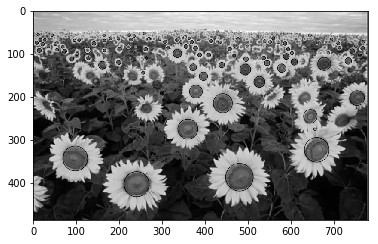

In [23]:
sunflower=cv2.imread('sunflower.jpg',0)
org_sunflower=sunflower
detector=cv2.SimpleBlobDetector_create()
keypoints=detector.detect(sunflower)
blank=np.zeros((1,1))
blob=cv2.drawKeypoints(sunflower,keypoints,blank,(0,0,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(blob)